In [85]:
import glob
import mne
import pandas as pd
import scipy.io
import numpy as np
import ast
import re
import scipy.io
from scipy.fftpack import fft
from scipy.signal import welch
import matplotlib.pyplot as plt
import pickle
from matplotlib.animation import FuncAnimation
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from functions_clean import *

# Data Loading

In [78]:
adr_train,adr_electrodes_pos = load_eeg('./Data/TrainData/ADR_train.mat')
adr_test, _ = load_eeg('./Data/TrainData/ADR_test.mat')

p6_train, p6_electrodes_pos = load_eeg('./Data/TrainData/P6_train.mat')
p6_test, _ = load_eeg('./Data/TrainData/P6_test.mat')

p7_train, p7_electrodes_pos = load_eeg('./Data/TrainData/P7_train.mat')
p7_test, _ = load_eeg('./Data/TrainData/P7_test.mat')

p8_train, p8_electrodes_pos = load_eeg('./Data/TrainData/P8_train.mat')
p8_test, _ = load_eeg('./Data/TrainData/P8_test.mat')

# Building DataFrame for each Participants

In [79]:
adr_data_array_train = preprocess_eeg_data(adr_train, n_epochs=400, n_channels=128)
adr_data_array_test = preprocess_eeg_data(adr_test, n_epochs=400, n_channels=128)

p6_data_array_train = preprocess_eeg_data(p6_train, n_epochs=520, n_channels=128)
p6_data_array_test = preprocess_eeg_data(p6_test, n_epochs=520, n_channels=128)

p7_data_array_train = preprocess_eeg_data(p7_train, n_epochs=520, n_channels=128)
p7_data_array_test = preprocess_eeg_data(p7_test, n_epochs=520, n_channels=128)

p8_data_array_train = preprocess_eeg_data(p8_train, n_epochs=520, n_channels=128)
p8_data_array_test = preprocess_eeg_data(p8_test, n_epochs=520, n_channels=128)

adr_info = create_mne_info(adr_train, adr_electrodes_pos)
p6_info = create_mne_info(p6_train, p6_electrodes_pos)
p7_info = create_mne_info(p7_train, p7_electrodes_pos)
p8_info = create_mne_info(p8_train, p8_electrodes_pos)

C:\Users\Home\Documents\EPFL\Semester project\Code\functions_clean.py:71: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)
C:\Users\Home\Documents\EPFL\Semester project\Code\functions_clean.py:71: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)
C:\Users\Home\Documents\EPFL\Semester project\Code\functions_clean.py:71: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)
C:\Users\Home\Documents\EPFL\Semester project\Code\functions_clean.py:71: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)


# Looking for Channel Bridging

In [4]:
adr_ed_matrix_train = compute_ed_matrix(adr_data_array_train)
adr_ed_matrix_test = compute_ed_matrix(adr_data_array_test)

p6_ed_matrix_train = compute_ed_matrix(p6_data_array_train)
p6_ed_matrix_test = compute_ed_matrix(p6_data_array_test)

p7_ed_matrix_train = compute_ed_matrix(p7_data_array_train)
p7_ed_matrix_test = compute_ed_matrix(p7_data_array_test)

p8_ed_matrix_train = compute_ed_matrix(p8_data_array_train)
p8_ed_matrix_test = compute_ed_matrix(p8_data_array_test)

In [5]:
plot_ed_matrix(adr_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs ADR train", output_dir='./Image/ADR Train ED', filename= 'ED_ADR_train')
plot_ed_matrix(adr_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs ADR test",output_dir='./Image/ADR Test ED', filename= 'ED_ADR_train')

plot_ed_matrix(p6_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs P6 train", output_dir='./Image/P6 Train ED', filename= 'ED_P6_train')
plot_ed_matrix(p6_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs P6 test", output_dir='./Image/P6 Test ED', filename= 'ED_P6_train')

plot_ed_matrix(p7_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs P7 train", output_dir='./Image/P7 Train ED', filename= 'ED_P7_train')
plot_ed_matrix(p7_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs P7 test", output_dir='./Image/P7 Test ED', filename= 'ED_P7_train')

plot_ed_matrix(p8_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs P8 train", output_dir='./Image/P8 Train ED', filename= 'ED_P8_train')
plot_ed_matrix(p8_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs P8 test", output_dir='./Image/P8 Test ED', filename= 'ED_P8_train')

Figure saved at ./Image/ADR Train ED\ED_ADR_train.png
Figure saved at ./Image/ADR Test ED\ED_ADR_train.png
Figure saved at ./Image/P6 Train ED\ED_P6_train.png
Figure saved at ./Image/P6 Test ED\ED_P6_train.png
Figure saved at ./Image/P7 Train ED\ED_P7_train.png
Figure saved at ./Image/P7 Test ED\ED_P7_train.png
Figure saved at ./Image/P8 Train ED\ED_P8_train.png
Figure saved at ./Image/P8 Test ED\ED_P8_train.png


In [6]:
plot_ed_matrix(adr_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs ADR train",vmax=5, output_dir='./Image/ADR Train ED thr 5', filename='ED_ADR_train_trh_5')
plot_ed_matrix(adr_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs ADR test",vmax=5, output_dir='./Image/ADR Test ED thr 5', filename='ED_ADR_test_trh_5')

plot_ed_matrix(p6_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs P6 train",vmax=5, output_dir='./Image/P6 Train ED thr 5', filename='ED_P6_train_trh_5')
plot_ed_matrix(p6_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs P6 test",vmax=5, output_dir='./Image/P6 Test ED thr 5', filename='ED_P6_test_trh_5')

plot_ed_matrix(p7_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs P7 train",vmax=5, output_dir='./Image/P7 Train ED thr 5', filename='ED_P7_train_trh_5')
plot_ed_matrix(p7_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs P7 test",vmax=5, output_dir='./Image/P7 Test ED thr 5', filename='ED_P7_test_trh_5')

plot_ed_matrix(p8_ed_matrix_train,"Median Electrical Distance Matrix Across Epochs P8 train",vmax=5, output_dir='./Image/P8 Train ED thr 5', filename='ED_P8_train_trh_5')
plot_ed_matrix(p8_ed_matrix_test, "Median Electrical Distance Matrix Across Epochs P8 test",vmax=5, output_dir='./Image/P7 Test ED thr 5', filename='ED_P8_test_trh_5')

Figure saved at ./Image/ADR Train ED thr 5\ED_ADR_train_trh_5.png
Figure saved at ./Image/ADR Test ED thr 5\ED_ADR_test_trh_5.png
Figure saved at ./Image/P6 Train ED thr 5\ED_P6_train_trh_5.png
Figure saved at ./Image/P6 Test ED thr 5\ED_P6_test_trh_5.png
Figure saved at ./Image/P7 Train ED thr 5\ED_P7_train_trh_5.png
Figure saved at ./Image/P7 Test ED thr 5\ED_P7_test_trh_5.png
Figure saved at ./Image/P8 Train ED thr 5\ED_P8_train_trh_5.png
Figure saved at ./Image/P7 Test ED thr 5\ED_P8_test_trh_5.png


# Building MNE Epochs object for analysis and dropping 0 columns and rows on Epochs and Dataframe

In [80]:
adr_epochs_train = create_epochs(adr_data_array_train, adr_info, baseline=None)
adr_epochs_train = drop_data(adr_epochs_train, channels_to_drop=check_zero_channels(adr_train, adr_info['ch_names']),
                   epoch_indices_to_drop=check_zero_epochs(adr_data_array_train))
adr_epochs_test = create_epochs(adr_data_array_test, adr_info, baseline = None)
adr_epochs_test = drop_data(adr_epochs_test, channels_to_drop=check_zero_channels(adr_test, adr_info['ch_names']),
                         epoch_indices_to_drop=check_zero_epochs(adr_data_array_test))

p6_epochs_train = create_epochs(p6_data_array_train, p6_info, baseline = None)
p6_epochs_train = drop_data(p6_epochs_train, channels_to_drop= check_zero_channels(p6_train, p6_info['ch_names']),
                            epoch_indices_to_drop=check_zero_epochs(p6_data_array_train))
p6_epochs_test = create_epochs(p6_data_array_test, p6_info, baseline = None)
p6_epochs_test = drop_data(p6_epochs_test, channels_to_drop= check_zero_channels(p6_train, p6_info['ch_names']),
                           epoch_indices_to_drop=check_zero_epochs(p6_data_array_test))

p7_epochs_train = create_epochs(p7_data_array_train, p7_info, baseline = None)
p7_epochs_train = drop_data(p7_epochs_train, channels_to_drop= check_zero_channels(p7_train, p7_info['ch_names']),
                            epoch_indices_to_drop=check_zero_epochs(p7_data_array_train))
p7_epochs_test = create_epochs(p7_data_array_test, p7_info, baseline = None)
p7_epochs_test= drop_data(p7_epochs_test,channels_to_drop=check_zero_channels(p7_test, p7_info['ch_names']),
                          epoch_indices_to_drop= check_zero_epochs(p7_data_array_test))

p8_epochs_train = create_epochs(p8_data_array_train, p8_info, baseline = None)
p8_epochs_train = drop_data(p8_epochs_train,channels_to_drop=check_zero_channels(p8_train,p8_info['ch_names']),
                            epoch_indices_to_drop=check_zero_epochs(p8_data_array_train))

p8_epochs_test = create_epochs(p8_data_array_test, p8_info, baseline = None)
p8_epochs_test = drop_data(p8_epochs_test, channels_to_drop=check_zero_channels(p8_train, p8_info['ch_names']),
                           epoch_indices_to_drop=check_zero_epochs(p8_data_array_test))

Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated
Dropped 12 epochs: 3, 31, 43, 72, 74, 80, 139, 147, 218, 259, 296, 300
Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated
Dropped 14 epochs: 169, 187, 200, 201, 212, 215, 260, 261, 262, 271, 290, 293, 300, 301
Not setting metadata
520 matching events found
No baseline correction applied
0 projection items activated
Dropped 0 epochs: 
Not setting metadata
520 matching events found
No baseline correction applied
0 projection items activated
Dropped 0 epochs: 
Not setting metadata
520 matching events found
No baseline correction applied
0 projection items activated
Dropped 42 epochs: 71, 72, 73, 88, 89, 100, 120, 130, 131, 142, 161, 162, 188, 189, 190, 191, 192, 243, 252, 253, 263, 300, 301, 302, 303, 337, 353, 368, 387, 390, 395, 433, 437, 440, 457, 458, 459, 487, 488, 489, 490, 494
Not setting metadata
520 matching events foun

In [81]:
adr_train = adr_train.drop(check_zero_channels(adr_train, adr_info['ch_names']), axis=1)
adr_train = adr_train.drop(check_zero_epochs(adr_data_array_train), axis=0)

adr_test = adr_test.drop(check_zero_channels(adr_test, adr_info['ch_names']), axis=1)
adr_test = adr_test.drop(check_zero_epochs(adr_data_array_test), axis=0)

p6_test = p6_test.drop(check_zero_channels(p6_test, p6_info['ch_names']), axis=1)
p6_test = p6_test.drop(check_zero_epochs(p6_data_array_test), axis=0)

p6_train = p6_train.drop(check_zero_channels(p6_train, p6_info['ch_names']), axis=1)
p6_train = p6_train.drop(check_zero_epochs(p6_data_array_train), axis=0)

p7_train = p7_train.drop(check_zero_channels(p7_train, p7_info['ch_names']), axis=1)
p7_train = p7_train.drop(check_zero_epochs(p7_data_array_train), axis=0)

p7_test = p7_test.drop(check_zero_channels(p7_test, p7_info['ch_names']), axis=1)
p7_test = p7_test.drop(check_zero_epochs(p7_data_array_test), axis=0)

p8_train = p8_train.drop(check_zero_channels(p8_train, p8_info['ch_names']), axis=1)
p8_train = p8_train.drop(check_zero_epochs(p8_data_array_train), axis=0)

p8_test = p8_test.drop(check_zero_channels(p8_test, p8_info['ch_names']), axis=1)
p8_test = p8_test.drop(check_zero_epochs(p8_data_array_test), axis=0)

# PSD plots

Effective window size : 2.002 (s)
Averaging across epochs...
PSD plot saved as './Image/PSD plots\adr_train_psd_plot.png'
Topomap plot saved as './Image/PSD Topo plots\adr_train_psd_plot_topo.png'
Effective window size : 2.002 (s)
Averaging across epochs...
PSD plot saved as './Image/PSD plots\adr_train_psd_plot.png'
Topomap plot saved as './Image/PSD Topo plots\adr_train_psd_plot_topo.png'
Effective window size : 2.000 (s)
Averaging across epochs...
PSD plot saved as './Image/PSD plots\p6_train_psd_plot.png'
Topomap plot saved as './Image/PSD Topo plots\p6_train_psd_plot_topo.png'
Effective window size : 2.000 (s)
Averaging across epochs...
PSD plot saved as './Image/PSD plots\p6_test_psd_plot.png'
Topomap plot saved as './Image/PSD Topo plots\p6_test_psd_plot_topo.png'
Effective window size : 2.000 (s)
Averaging across epochs...
PSD plot saved as './Image/PSD plots\p7_train_psd_plot.png'
Topomap plot saved as './Image/PSD Topo plots\p7_train_psd_plot_topo.png'
Effective window size :

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

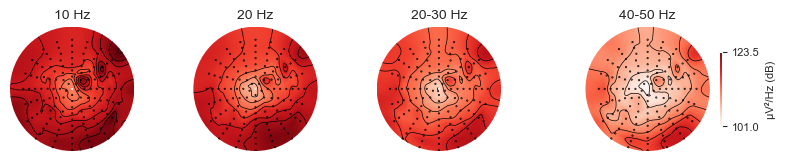

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

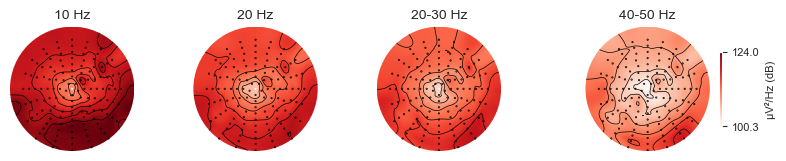

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

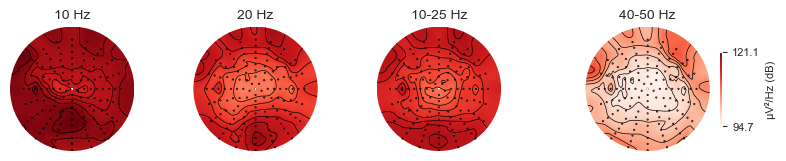

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

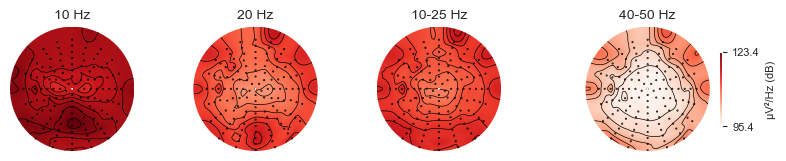

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

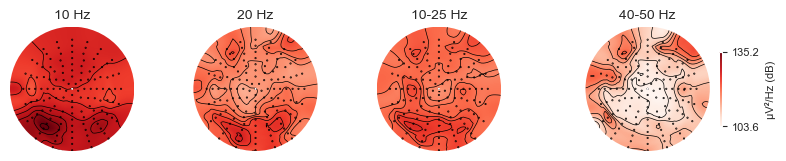

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

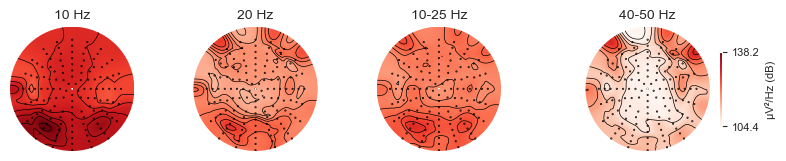

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

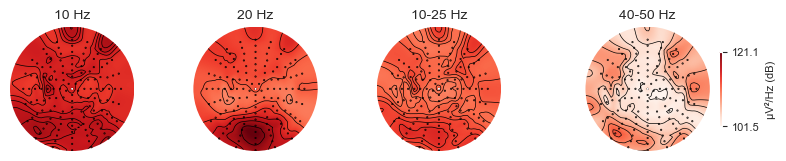

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

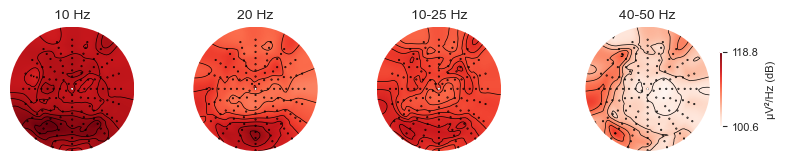

In [21]:
adr_psd_train = compute_psd(adr_epochs_train)
save_psd_plot(adr_psd_train,output_dir='./Image/PSD plots', filename= "adr_train_psd_plot")
plot_topomap(adr_psd_train, bands={"10 Hz": 10, "20 Hz": 20, "20-30 Hz": (20, 30), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="adr_train_psd_plot_topo")

adr_psd_test = compute_psd(adr_epochs_test)
save_psd_plot(adr_psd_test,output_dir='./Image/PSD plots', filename="adr_train_psd_plot")
plot_topomap(adr_psd_test, bands={"10 Hz": 10, "20 Hz": 20, "20-30 Hz": (20, 30), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="adr_train_psd_plot_topo")

p6_psd_train = compute_psd(p6_epochs_train)
save_psd_plot(p6_psd_train,output_dir='./Image/PSD plots', filename="p6_train_psd_plot")
plot_topomap(p6_psd_train, bands={"10 Hz": 10, "20 Hz": 20, "10-25 Hz": (10, 25), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="p6_train_psd_plot_topo")

p6_psd_test = compute_psd(p6_epochs_test)
save_psd_plot(p6_psd_test,output_dir='./Image/PSD plots', filename="p6_test_psd_plot")
plot_topomap(p6_psd_test, bands={"10 Hz": 10, "20 Hz": 20, "10-25 Hz": (10, 25), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="p6_test_psd_plot_topo")

p7_psd_train = compute_psd(p7_epochs_train)
save_psd_plot(p7_psd_train, output_dir='./Image/PSD plots', filename="p7_train_psd_plot")
plot_topomap(p7_psd_train, bands={"10 Hz": 10, "20 Hz": 20, "10-25 Hz": (10, 25), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="p7_train_psd_plot_topo")

p7_psd_test = compute_psd(p7_epochs_test)
save_psd_plot(p7_psd_test, output_dir='./Image/PSD plots', filename="p7_test_psd_plot")
plot_topomap(p7_psd_test, bands={"10 Hz": 10, "20 Hz": 20, "10-25 Hz": (10, 25), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="p7_test_psd_plot_topo")

p8_psd_train = compute_psd(p8_epochs_train)
save_psd_plot(p8_psd_train,output_dir='./Image/PSD plots', filename="p8_train_psd_plot")
plot_topomap(p8_psd_train, bands={"10 Hz": 10, "20 Hz": 20, "10-25 Hz": (10, 25), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="p8_train_psd_plot_topo")

p8_psd_test = compute_psd(p8_epochs_test)
save_psd_plot(p8_psd_test,output_dir='./Image/PSD plots', filename="p8_test_psd_plot")
plot_topomap(p8_psd_test, bands={"10 Hz": 10, "20 Hz": 20, "10-25 Hz": (10, 25), "40-50 Hz": (40, 50)},
             output_dir='./Image/PSD Topo plots',filename="p8_test_psd_plot_topo")

# ICA

In [22]:
adr_ica_train = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
adr_ica_train.fit(inst=adr_epochs_train)
adr_ica_test = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
adr_ica_test.fit(inst=adr_epochs_test)

p6_ica_train = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
p6_ica_train.fit(inst=p6_epochs_train)
p6_ica_test = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
p6_ica_test.fit(inst=p6_epochs_test)

p7_ica_train = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
p7_ica_train.fit(inst=p7_epochs_train)
p7_ica_test = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
p7_ica_test.fit(inst=p7_epochs_test)

p8_ica_train = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
p8_ica_train.fit(inst=p8_epochs_train)
p8_ica_test = mne.preprocessing.ICA(n_components=20, method='infomax', random_state=42)
p8_ica_test.fit(inst=p8_epochs_test)

Fitting ICA to data using 127 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  adr_ica_train.fit(inst=adr_epochs_train)


Selecting by number: 20 components
 
Fitting ICA took 83.7s.
Fitting ICA to data using 127 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  adr_ica_test.fit(inst=adr_epochs_test)


Selecting by number: 20 components
 
Fitting ICA took 67.2s.
Fitting ICA to data using 128 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:7: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  p6_ica_train.fit(inst=p6_epochs_train)


Selecting by number: 20 components
 
Fitting ICA took 79.1s.
Fitting ICA to data using 128 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:9: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  p6_ica_test.fit(inst=p6_epochs_test)


Selecting by number: 20 components
 
Fitting ICA took 83.2s.
Fitting ICA to data using 128 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:12: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  p7_ica_train.fit(inst=p7_epochs_train)


Selecting by number: 20 components
 
Fitting ICA took 78.9s.
Fitting ICA to data using 128 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  p7_ica_test.fit(inst=p7_epochs_test)


Selecting by number: 20 components
 
Fitting ICA took 82.4s.
Fitting ICA to data using 128 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:17: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  p8_ica_train.fit(inst=p8_epochs_train)


Selecting by number: 20 components
 
Fitting ICA took 77.9s.
Fitting ICA to data using 128 channels (please be patient, this may take a while)


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\3377474431.py:19: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  p8_ica_test.fit(inst=p8_epochs_test)


Selecting by number: 20 components
 
Fitting ICA took 74.9s.


Method,infomax
Fit parameters,extended=Falsemax_iter=500
Fit,500 iterations on epochs (525312 samples)
ICA components,20
Available PCA components,128
Channel types,eeg
ICA components marked for exclusion,—


# Saving ICA Component properties plots

In [23]:
save_ica_component_properties(adr_ica_train, adr_epochs_train, "adr_train", output_dir="./Image/ADR Train ICA")
save_ica_component_properties(adr_ica_test,adr_epochs_test, "adr_test", output_dir="./Image/ADR Test ICA")

save_ica_component_properties(p6_ica_train, p6_epochs_train, "p6_train", output_dir="./Image/P6 Train ICA")
save_ica_component_properties(p6_ica_test,p6_epochs_test, "p6_test", output_dir="./Image/P6 Test ICA")

save_ica_component_properties(p7_ica_train,p7_epochs_train, "p7_train", output_dir="./Image/P7 Train ICA")
save_ica_component_properties(p7_ica_test,p7_epochs_test, "p7_test", output_dir="./Image/P7 Test ICA")

save_ica_component_properties(p8_ica_train, p8_epochs_train, "p8_train", output_dir="./Image/P8 Train ICA")
save_ica_component_properties(p8_ica_test,p8_epochs_test, "p8_test", output_dir="./Image/P8 Test ICA")

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
388 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
388 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
388 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
388 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
388 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
388 matching events found
No baseline correction applied
0 projection items ac

In [60]:
from sklearn.svm import SVC

def compute_accuracy_vs_contrast_with_sigmoid(
        epochs_train, adr_train_data, epochs_test, adr_test_data, model_name,
        plot=True, min_samples=5, output_dir ='', filename='',
):
    """
    Train an LDA model on frequency labels, compute accuracy as a function of contrast,
    and fit a sigmoid psychometric function.

    Parameters:
    -----------
    epochs_train : mne.Epochs
        Training EEG data.
    adr_train_data : pandas.DataFrame
        DataFrame containing training labels (Frequency and optional Contrast).
    epochs_test : mne.Epochs
        Test EEG data.
    adr_test_data : pandas.DataFrame
        DataFrame containing test labels (Frequency and Contrast).
    plot : bool, optional
        Whether to plot accuracy vs. contrast (default: True).
    min_samples : int, optional
        Minimum number of samples per contrast to compute accuracy (default: 5).

    Returns:
    --------
    sorted_contrasts : np.ndarray
        Array of unique contrast values (sorted).
    sorted_accuracies : np.ndarray
        Array of accuracies corresponding to the sorted contrasts.
    sigmoid_params : tuple
        Parameters of the fitted sigmoid function (a, b, c, d).
    """

    os.makedirs(output_dir, exist_ok=True)    # Step 1: Prepare the training data
    # Extract raw EEG data and flatten
    X_train = epochs_train.get_data(copy=True)  # Training EEG data
    X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to (n_epochs_train, n_features)

    # Convert training frequency labels to a flat 1D array
    y_train = np.array([float(label) for label in adr_train_data.Frequency])

    # Step 2: Train the LDA model
    if model_name =='LDA':
        model = LinearDiscriminantAnalysis()
    elif model_name =='SVM':
        model = SVC(verbose=False)
        
    
    model.fit(X_train, y_train)

    # Step 3: Prepare the test data
    X_test = epochs_test.get_data(copy=True)  # Test EEG data
    X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten to (n_epochs_test, n_features)

    # Convert test frequency labels and contrast values to flat 1D arrays
    y_test = np.array([float(label) for label in adr_test_data.Frequency])
    contrast_test = np.array([float(label) for label in adr_test_data.Contrast])

    # Step 4: Predict the frequency values for the test data
    y_pred = model.predict(X_test)

    # Step 5: Compute accuracy for each contrast
    accuracy_dict = {}
    unique_contrasts = np.unique(contrast_test)  # Get unique contrast values

    for contrast in unique_contrasts:
        # Find indices of test samples with the current contrast
        idx = np.where(contrast_test == contrast)[0]

        # Skip contrasts with fewer than min_samples
        if len(idx) < min_samples:
            print(f"Skipping contrast {contrast} due to insufficient samples ({len(idx)} samples).")
            continue

        # Compute accuracy for this contrast
        accuracy = accuracy_score(y_test[idx], y_pred[idx])  # Compare true vs predicted
        accuracy_dict[contrast] = accuracy

    # Step 6: Sort contrasts and accuracies
    sorted_contrasts = np.array(sorted(accuracy_dict.keys()))  # Sorted contrast values
    sorted_accuracies = np.array([accuracy_dict[contrast] for contrast in sorted_contrasts])

    # Step 7: Fit a sigmoid function to the accuracy vs contrast data
    initial_guess = [0.5, 1.0, 1.0, np.median(sorted_contrasts)]  # Initial params: [a, b, c, d]
    sigmoid_params, _ = curve_fit(sigmoid, sorted_contrasts, sorted_accuracies, p0=initial_guess, maxfev=10000)


    plt.figure(figsize=(8, 6))

    # Plot the raw accuracy data
    plt.scatter(sorted_contrasts, sorted_accuracies, color="b", label="Accuracy (data)", zorder=2)

    # Plot the sigmoid fit
    x_fit = np.linspace(sorted_contrasts.min(), sorted_contrasts.max(), 500)
    sigmoid_fit = sigmoid(x_fit, *sigmoid_params)
    plt.plot(x_fit, sigmoid_fit, color="r", linestyle="--", label="Sigmoid fit", zorder=1)

    # Add labels and title
    plt.xlabel("Contrast", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title("Accuracy vs Contrast (with Sigmoid Fit)", fontsize=16)
    plt.legend(fontsize=12)

    plt.axhline(y=0.75, color='r', linestyle='--')

    y_fit = sigmoid(x_fit, *sigmoid_params)
    x_75_index = np.searchsorted(y_fit.ravel(), 0.75)
    if x_75_index < len(x_fit):
        x_75 = x_fit[x_75_index]
        plt.axvline(x=x_75, color='r', linestyle='--', label=f'75% Accuracy: {x_75:.2f}')
        plt.annotate(f'{x_75:.2f}', (x_75, 0.75), textcoords="offset points", xytext=(0, 10), ha='center')
    else:
        print(f"Warning: 75% accuracy not reached for fit.")
        
    plt.grid(True, linestyle="--", alpha=0.6)

    save_path = os.path.join(output_dir, f'{filename}.png')
    plt.savefig(save_path)
    
    if plot:

        plt.show()

    return sorted_contrasts, sorted_accuracies, sigmoid_params

(array([ 0.1   ,  0.1399,  0.1956,  0.2736,  0.3827,  0.5353,  0.7486,
         1.0471,  1.4645,  2.0484,  2.865 ,  4.0072,  5.6047,  7.8392,
        10.9643, 15.3354, 21.4491, 30.    ]),
 array([0.46153846, 0.56      , 0.57692308, 0.5       , 0.61538462,
        0.61538462, 0.76923077, 0.32      , 0.38461538, 0.48      ,
        0.57692308, 0.56      , 0.53846154, 0.72      , 0.84      ,
        0.84615385, 0.92      , 0.98076923]),
 array([0.5294756 , 0.91304911, 0.70389844, 8.31726225]))

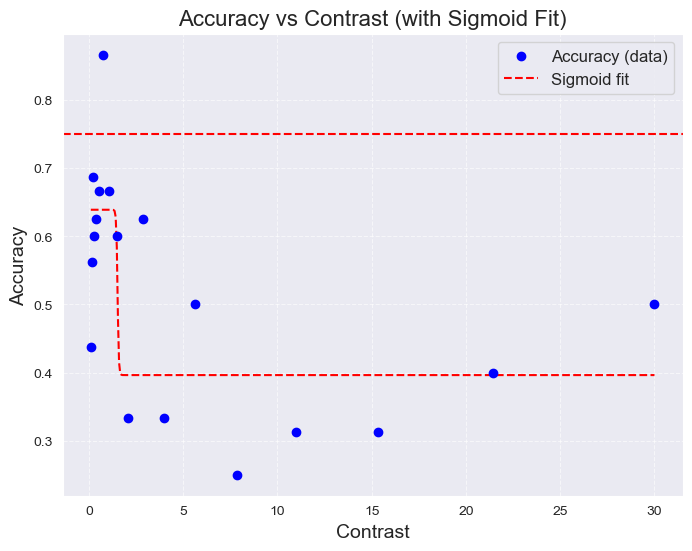

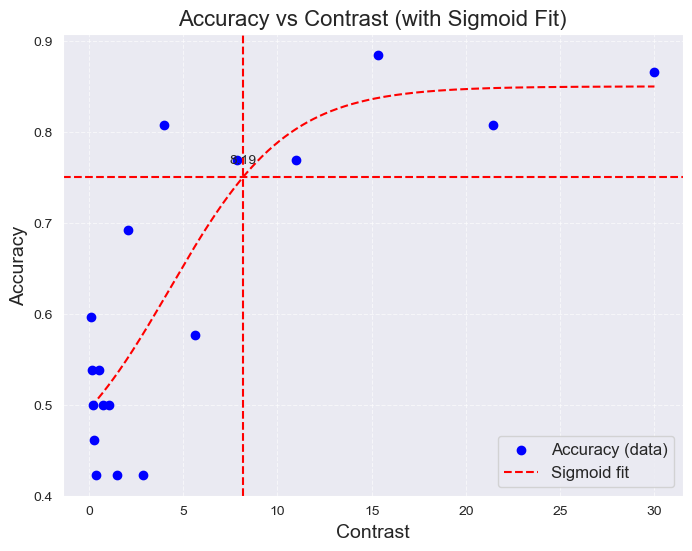

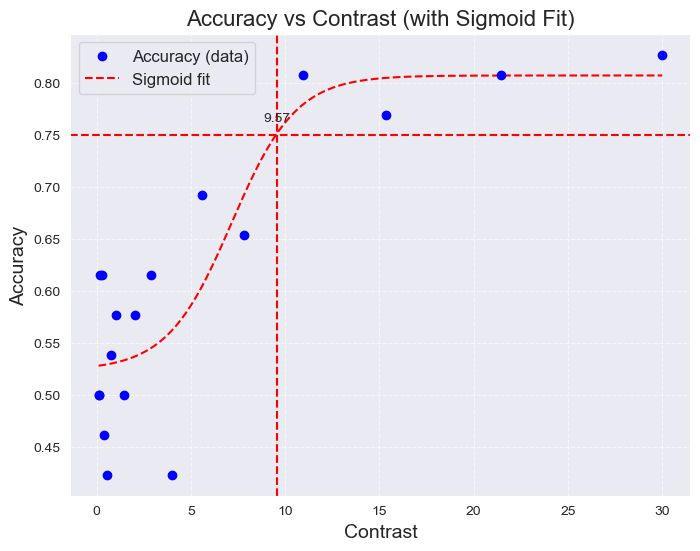

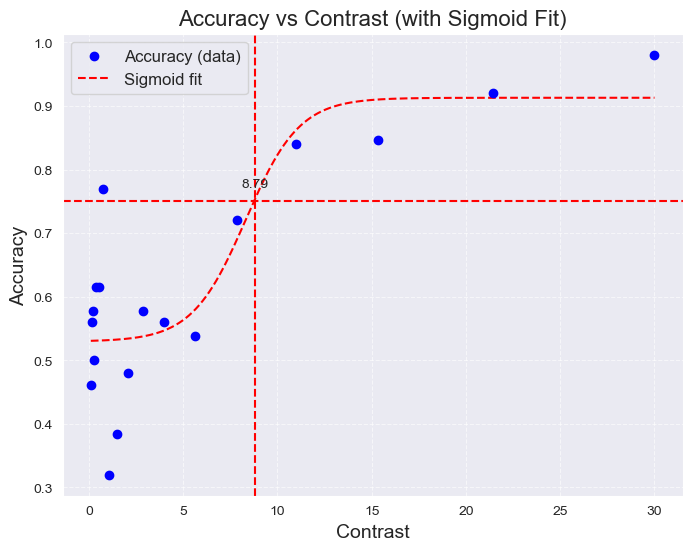

In [59]:
compute_accuracy_vs_contrast_with_sigmoid(adr_epochs_train, adr_train, adr_epochs_test, adr_test, 'LDA',
        plot=False, min_samples=5, output_dir ='./Image/Threshold_Prediction', filename='ADR_LDA',
)
compute_accuracy_vs_contrast_with_sigmoid(p6_epochs_train, p6_train, p6_epochs_test, p6_test, 'LDA',
                                          plot=False, min_samples=5, output_dir ='./Image/Threshold_Prediction', filename='P6_LDA',
                                          )
compute_accuracy_vs_contrast_with_sigmoid(p7_epochs_train, p7_train, p7_epochs_test, p7_test, 'LDA',
                                          plot=False, min_samples=5, output_dir ='./Image/Threshold_Prediction', filename='P7_LDA',
                                          )
compute_accuracy_vs_contrast_with_sigmoid(p8_epochs_train, p8_train, p8_epochs_test, p8_test, 'LDA',
                                          plot=False, min_samples=5, output_dir='./Image/Threshold_Prediction',
                                          filename='P8_LDA',
                                          )

(array([ 0.1   ,  0.1399,  0.1956,  0.2736,  0.3827,  0.5353,  0.7486,
         1.0471,  1.4645,  2.0484,  2.865 ,  4.0072,  5.6047,  7.8392,
        10.9643, 15.3354, 21.4491, 30.    ]),
 array([0.57692308, 0.44      , 0.57692308, 0.38461538, 0.46153846,
        0.65384615, 0.73076923, 0.4       , 0.53846154, 0.44      ,
        0.46153846, 0.48      , 0.53846154, 0.68      , 0.96      ,
        0.88461538, 0.88      , 1.        ]),
 array([0.51371031, 0.93144302, 1.91311835, 8.04909499]))

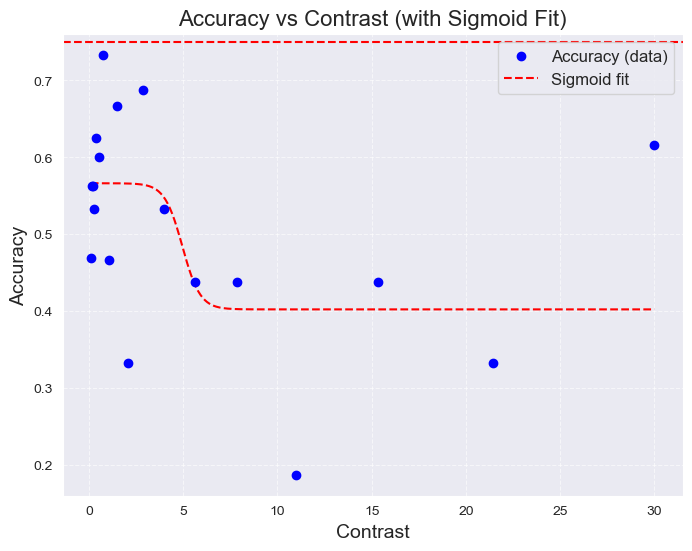

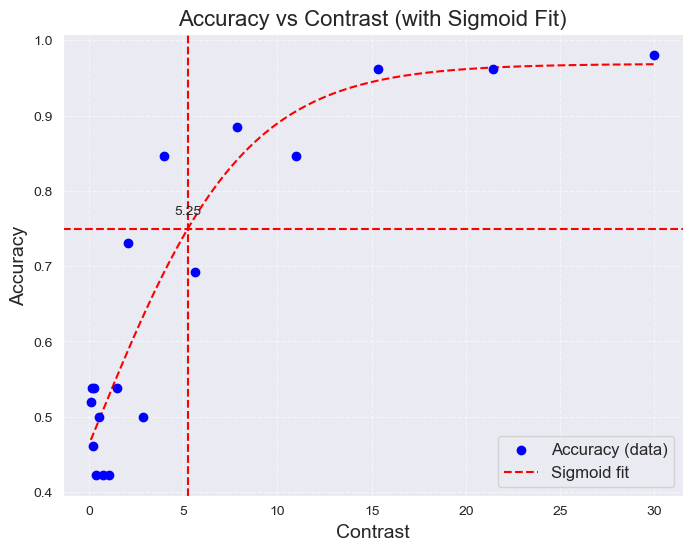

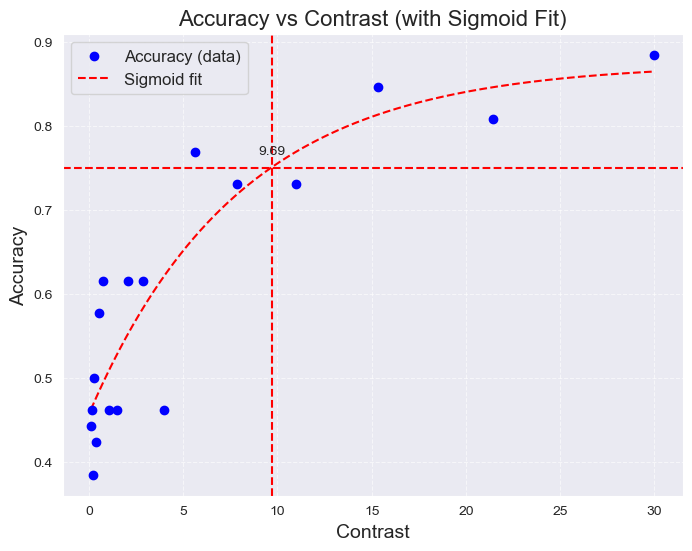

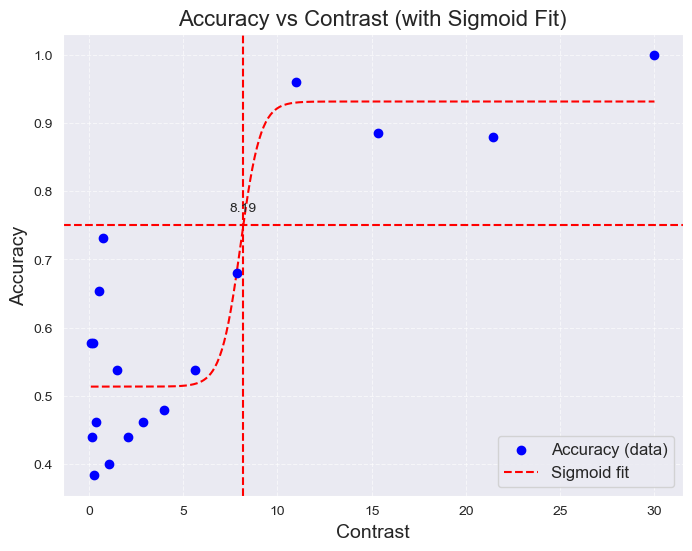

In [61]:
compute_accuracy_vs_contrast_with_sigmoid(adr_epochs_train, adr_train, adr_epochs_test, adr_test, 'SVM',
                                          plot=False, min_samples=5, output_dir ='./Image/Threshold_Prediction', filename='ADR_SVM',
                                          )
compute_accuracy_vs_contrast_with_sigmoid(p6_epochs_train, p6_train, p6_epochs_test, p6_test, 'SVM',
                                          plot=False, min_samples=5, output_dir ='./Image/Threshold_Prediction', filename='P6_SVM',
                                          )
compute_accuracy_vs_contrast_with_sigmoid(p7_epochs_train, p7_train, p7_epochs_test, p7_test, 'SVM',
                                          plot=False, min_samples=5, output_dir ='./Image/Threshold_Prediction', filename='P7_SVM',
                                          )
compute_accuracy_vs_contrast_with_sigmoid(p8_epochs_train, p8_train, p8_epochs_test, p8_test, 'SVM',
                                          plot=False, min_samples=5, output_dir='./Image/Threshold_Prediction', filename='P8_SVM',
                                          )

In [6]:
# Define the ranges of electrodes to keep
electrodes_to_keep = []

electrodes_to_keep.extend([f'A{i}' for i in range(2, 33)])
electrodes_to_keep.extend([f'B{i}' for i in range(2, 20)])
electrodes_to_keep.extend([f'D{i}' for i in range(16, 18)])
electrodes_to_keep.extend([f'D{i}' for i in range(24, 33)])

# Keep only the specified electrodes in the training set
epochs_train.pick(electrodes_to_keep)

# Keep only the specified electrodes in the test set
epochs_test.pick(electrodes_to_keep)
# Filter the channel positions to include only the specified electrodes

NameError: name 'epochs_train' is not defined

In [70]:
p8_test_test = p8_epochs_train.get_data()


C:\Users\Home\AppData\Local\Temp\ipykernel_37112\1917686404.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  p8_test_test = p8_epochs_train.get_data()


In [77]:
p8_test.shape()

TypeError: 'tuple' object is not callable

In [6]:


covar_matrix = mne.Covariance(p8_epochs_train.get_data(copy=True),p8_info['ch_names'],bads=[],projs = [], nfree= 530*1024-1)

In [ ]:
import seaborn

seaborn.heatmap(covar_matrix.data[0], annot=True)

<Axes: >

In [7]:
test_covar = covar_matrix.data.mean(axis=0)

In [8]:
np.mean(test_covar,axis=1)
cov_matrices = np.zeros((1024, 128, 128))

for t in range(128):
    # Extract the data for the specific time point across channels
    time_point_data = test_covar[:, t].reshape(-1, 1)  # Shape: (n_channels, 1)

    # Compute covariance matrix for this time point
    cov_matrices[t] = np.dot(time_point_data, time_point_data.T)  # Shape: (n_channels, n_channels)

# Resulting shape
print("Covariance matrices shape:", cov_matrices.shape)

Covariance matrices shape: (1024, 128, 128)


In [9]:
eig_val,eig_vector = np.linalg.eig(cov_matrices)
print('E-value:', eig_val)
print('E-vector', eig_vector)

E-value: [[ 1.98773739e+02+0.00000000e+00j -2.15985916e-14+0.00000000e+00j
   1.69342734e-14+9.03737069e-15j ...  2.32630387e-18-7.53629146e-19j
   1.22056489e-19+2.02180344e-19j  1.22056489e-19-2.02180344e-19j]
 [ 2.05809011e+02+0.00000000e+00j -4.42221581e-15+2.16559521e-14j
  -4.42221581e-15-2.16559521e-14j ...  8.69032058e-19+0.00000000e+00j
   9.75357933e-20+0.00000000e+00j -9.17440712e-20+0.00000000e+00j]
 [ 2.05784566e+02+0.00000000e+00j -1.53027104e-14+0.00000000e+00j
  -1.42782869e-14+3.84553369e-15j ... -7.96844544e-19+0.00000000e+00j
   6.99732001e-19+0.00000000e+00j  3.42821301e-23+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.0

In [14]:
eig_vector.mean(axis=1).shape

(1024, 128)

In [11]:
dot_prod = np.dot(eig_vector.mean(axis = 1).T,cov_matrices.mean(axis = 1))

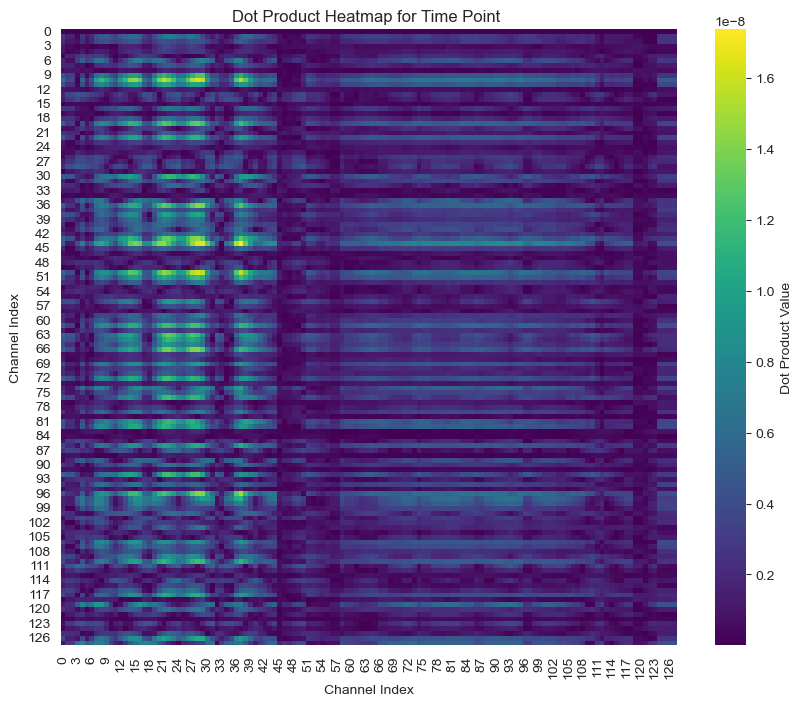

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(np.abs(np.real(dot_prod))   , cmap="viridis", square=True, cbar_kws={'label': 'Dot Product Value'})
plt.title(f"Dot Product Heatmap for Time Point ")
plt.xlabel("Channel Index")
plt.ylabel("Channel Index")
plt.show()

In [24]:
threshold = 0.8*1e-8
high_corr_indices = np.where(np.abs(np.real(dot_prod)) > threshold)

In [25]:
high_corr_indices

(array([  9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
          9,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,
         10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  11,
         11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  11,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  22,  22,  22,  22,  22,  22,
         22,  22,  22,  22,  22,  22,  22,  22,  22,  30,  30,  30,  30,
         30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
         30,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
         36,  36,  36,  36,  36,  36,  36,  38,  38,  38,  38,  38,  38,
         38,  38,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
         43,  43,  43,  43,  43,  43,  43,  43,  43,  44,  44,  44,  44,
         44,  44,  44,  44,  44,  44,  44,  44,  44,  44,  44,  44,  44,
         44,  44,  44,  44,  44,  44,  44,  44,  44

In [27]:
high_corr_pairs = [(p8_info['ch_names'][i], p8_info['ch_names'][j])
                   for i, j in zip(*high_corr_indices) if i != j]  # Exclude self-correlation

# Print out the high correlation pairs
for ch1, ch2,  in high_corr_pairs:
    print(f"Channels {ch1} and {ch2} have high correlation: ")
    

Channels A10 and A15 have high correlation: 
Channels A10 and A16 have high correlation: 
Channels A10 and A17 have high correlation: 
Channels A10 and A21 have high correlation: 
Channels A10 and A22 have high correlation: 
Channels A10 and A23 have high correlation: 
Channels A10 and A24 have high correlation: 
Channels A10 and A27 have high correlation: 
Channels A10 and A28 have high correlation: 
Channels A10 and A29 have high correlation: 
Channels A10 and A30 have high correlation: 
Channels A10 and B5 have high correlation: 
Channels A10 and B6 have high correlation: 
Channels A10 and B7 have high correlation: 
Channels A11 and A8 have high correlation: 
Channels A11 and A9 have high correlation: 
Channels A11 and A10 have high correlation: 
Channels A11 and A13 have high correlation: 
Channels A11 and A14 have high correlation: 
Channels A11 and A15 have high correlation: 
Channels A11 and A16 have high correlation: 
Channels A11 and A17 have high correlation: 
Channels A11 an

In [43]:
p8_epochs_train.get_data()[0].shape

C:\Users\Home\AppData\Local\Temp\ipykernel_1352\3570403875.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  p8_epochs_train.get_data()[0].shape


(128, 1024)

C:\Users\Home\AppData\Local\Temp\ipykernel_1352\226149699.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  p8_info.set_montage(montage)


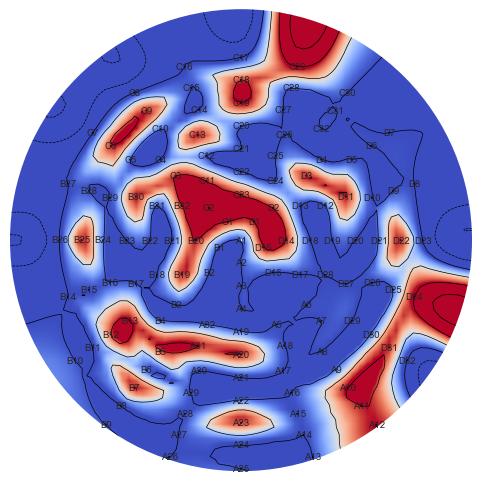

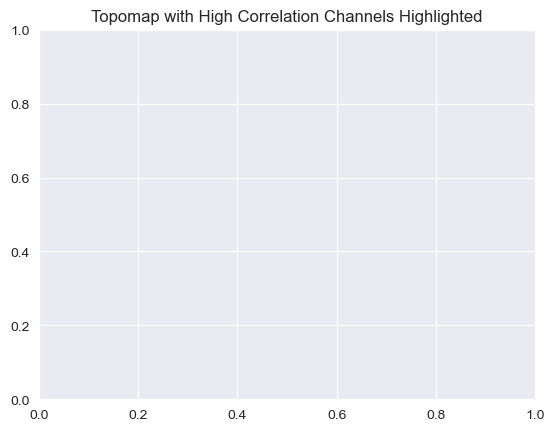

In [52]:
montage = mne.channels.make_dig_montage(ch_pos=p8_electrodes_pos)
p8_info.set_montage(montage)

high_corr_channel_indices = list(set([i for i, _ in zip(*high_corr_indices)]))

# Plot the topomap with highlighted channels
fig, ax = plt.subplots(figsize=(8, 6))
#mne.viz.plot_topomap(p8_epochs_train.get_data()[0].mean(axis=1), p8_info, show=False, cmap='viridis', axes=ax)



# Highlight the high-correlation channels on the topomap
highlighted_channels = np.array(high_corr_channel_indices)
highlighted_data = np.zeros(128)
highlighted_data[highlighted_channels] = 100  # Highlight by setting value to 1

# Plot the topomap again with highlighted channels
mne.viz.plot_topomap(highlighted_data, p8_info, show=True, cmap='coolwarm', axes=ax, names=p8_info['ch_names'])
plt.title("Topomap with High Correlation Channels Highlighted")

plt.show()

In [86]:
def plot_high_correlation_channels(p8_epochs_train, p8_info, p8_electrodes_pos, nfree=530*1024-1, threshold=0.8*1e-8):
    """
    This function computes the covariance matrix, calculates eigenvalues and eigenvectors, and highlights the
    channels with high correlation on a topomap.

    Parameters:
    ----------
    p8_epochs_train : mne.Epochs
        The MNE Epochs object containing EEG data.
    p8_info : mne.Info
        The MNE Info object containing channel information.
    p8_electrodes_pos : dict
        A dictionary with electrode positions.
    nfree : int, optional
        The number of degrees of freedom (default is 530*1024-1).
    threshold : float, optional
        The correlation threshold for highlighting (default is 0.8*1e-8).
    """
    # Compute covariance matrix
    covar_matrix = mne.Covariance(p8_epochs_train.get_data(copy=True), p8_info['ch_names'],
                                  bads=[], projs=[], nfree=nfree)

    # Compute the mean covariance matrix across time points
    test_covar = covar_matrix.data.mean(axis=0)

    # Initialize covariance matrices for each time point
    cov_matrices = np.zeros((128, 128, 128))

    for t in range(128):
        # Extract the data for the specific time point across channels
        time_point_data = test_covar[:, t].reshape(-1, 1)  # Shape: (n_channels, 1)

        # Compute covariance matrix for this time point
        cov_matrices[t] = np.dot(time_point_data, time_point_data.T)  # Shape: (n_channels, n_channels)


    # Calculate eigenvalues and eigenvectors
    eig_val, eig_vector = np.linalg.eig(cov_matrices)


    # Compute dot product
    dot_prod = np.dot(eig_vector.mean(axis=1).T, cov_matrices.mean(axis=1))

    # Plot the heatmap of the dot product
    plt.figure(figsize=(10, 8))
    sns.heatmap(np.abs(np.real(dot_prod)), cmap="viridis", square=True, cbar_kws={'label': 'Dot Product Value'})
    plt.title(f"Dot Product Heatmap for Time Points")
    plt.xlabel("Channel Index")
    plt.ylabel("Channel Index")
    plt.show()

    # Identify high correlation indices
    high_corr_indices = np.where(np.abs(np.real(dot_prod)) > threshold)

    # Identify pairs of high-correlation channels
    high_corr_pairs = [(p8_info['ch_names'][i], p8_info['ch_names'][j])
                       for i, j in zip(*high_corr_indices) if i != j]  # Exclude self-correlation

    # Print out the high correlation pairs
    for ch1, ch2 in high_corr_pairs:
        print(f"Channels {ch1} and {ch2} have high correlation.")

    # Set up electrode montage
    montage = mne.channels.make_dig_montage(ch_pos=p8_electrodes_pos)
    p8_info.set_montage(montage)

    # Get the indices of channels with high correlation
    high_corr_channel_indices = list(set([i for i, _ in zip(*high_corr_indices)]))

    # Create a data array for highlighting
    highlighted_data = np.zeros(128)
    highlighted_data[high_corr_channel_indices] = 100  # Highlight by setting value to 100

    # Plot the topomap with highlighted channels
    fig, ax = plt.subplots(figsize=(8, 6))
    mne.viz.plot_topomap(highlighted_data, p8_info, show=True, cmap='coolwarm', axes=ax, names=p8_info['ch_names'])
    plt.title("Topomap with High Correlation Channels Highlighted")
    plt.show()

In [107]:
import cv2
def create_high_correlation_video(p8_epochs_train, p8_info, p8_electrodes_pos, output_dir,filename, nfree=530*1024-1, threshold=0.8*1e-8, fps=10):
    """
    This function computes the covariance matrix for each time point, calculates eigenvalues and eigenvectors, and creates a video
    showing the evolution of high correlation channels over 1024 time points.

    Parameters:
    ----------
    p8_epochs_train : mne.Epochs
        The MNE Epochs object containing EEG data.
    p8_info : mne.Info
        The MNE Info object containing channel information.
    p8_electrodes_pos : dict
        A dictionary with electrode positions.
    output_dir : str, optional
        Directory to save the video file (default is 'high_correlation_video').
    nfree : int, optional
        The number of degrees of freedom (default is 530*1024-1).
    threshold : float, optional
        The correlation threshold for highlighting (default is 0.8*1e-8).
    fps : int, optional
        Frames per second for the video (default is 10).
    """

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Get the data from the epochs
    epochs_data = p8_epochs_train.get_data()  # Shape: (n_epochs, n_channels, n_time_points)

    # Initialize OpenCV video writer
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video_file = os.path.join(output_dir, f'{filename}.avi')
    out = cv2.VideoWriter(video_file, fourcc, fps, (640, 480))  # Frame size of 640x480 for the video

    # Set up electrode montage
    montage = mne.channels.make_dig_montage(ch_pos=p8_electrodes_pos)
    p8_info.set_montage(montage)

    dot_product_values = []

    # Loop over each time point (1024 frames)
    for t in range(1024):
        # Extract the data for the specific time point across all epochs
        time_point_data = epochs_data[:, :, t]  # Shape: (n_epochs, n_channels)

        # Compute the covariance matrix for this time point (across all epochs)
        cov_matrix = np.cov(time_point_data, rowvar=False)  # Shape: (n_channels, n_channels)

        # Calculate eigenvalues and eigenvectors for the averaged covariance matrix
        eig_val, eig_vector = np.linalg.eig(cov_matrix)

        # Compute the dot product of eigenvectors and covariance matrix (spatial features)
        dot_prod = np.dot(eig_vector.T, cov_matrix)

        # Store the absolute value of the dot product for plotting
        dot_product_values.append(np.abs(np.real(dot_prod)))

        # Identify high correlation indices
        high_corr_indices = np.where(np.abs(np.real(dot_prod)) > threshold)

        # Get the indices of channels with high correlation
        high_corr_channel_indices = list(set([i for i, _ in zip(*high_corr_indices)]))

        # Create a data array for highlighting
        highlighted_data = np.zeros(128)
        highlighted_data[high_corr_channel_indices] = 100  # Highlight by setting value to 100

        """# Plot the topomap for the current time point
        fig, ax = plt.subplots(figsize=(8, 6))
        mne.viz.plot_topomap(highlighted_data, p8_info, show=False, cmap='coolwarm', axes=ax, names=p8_info['ch_names'])
        plt.title(f"Topomap with High Correlation Channels at Time Point {t+1}")

        # Save the topomap as an image
        plt.tight_layout()
        img_path = os.path.join(output_dir, f"topomap_frame_{t+1}.png")
        plt.savefig(img_path)
        plt.close(fig)

        # Read the saved image and write it as a frame in the video
        frame = cv2.imread(img_path)
        frame_resized = cv2.resize(frame, (640, 480))  # Resize if necessary
        out.write(frame_resized)

        # Optionally, remove the image after adding it to the video
        os.remove(img_path)"""

        # Create a heatmap for the dot product values evolution
        plt.figure(figsize=(10, 8))
        sns.heatmap(dot_product_values[t], cmap="viridis", cbar_kws={'label': 'Dot Product Magnitude'}, square=True)
        plt.title("Evolution of Dot Product Values Across Time Points")
        plt.xlabel("Time Points")
        plt.ylabel("Channel Pairs")
    
        # Save the heatmap as an image
        dot_prod_plot_path = os.path.join(output_dir, "dot_product_evolution_heatmap.png")
        plt.tight_layout()
        plt.savefig(dot_prod_plot_path)
        plt.close()

        # Read the plot image and add it to the video
        frame = cv2.imread(dot_prod_plot_path)
        frame_resized = cv2.resize(frame, (640, 480))
        out.write(frame_resized)
    
        # Optionally, remove the plot image after adding it to the video
        os.remove(dot_prod_plot_path)

    # Release the video writer and finalize the video
    out.release()


    print(f"Video created and saved as {video_file}")

In [ ]:
create_high_correlation_video(p7_epochs_train,p7_info,p7_electrodes_pos, output_dir='./Video',filename='P7 Train Corr', fps=60)

C:\Users\Home\AppData\Local\Temp\ipykernel_1352\3842055799.py:29: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data = p8_epochs_train.get_data()  # Shape: (n_epochs, n_channels, n_time_points)
C:\Users\Home\AppData\Local\Temp\ipykernel_1352\3842055799.py:38: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  p8_info.set_montage(montage)


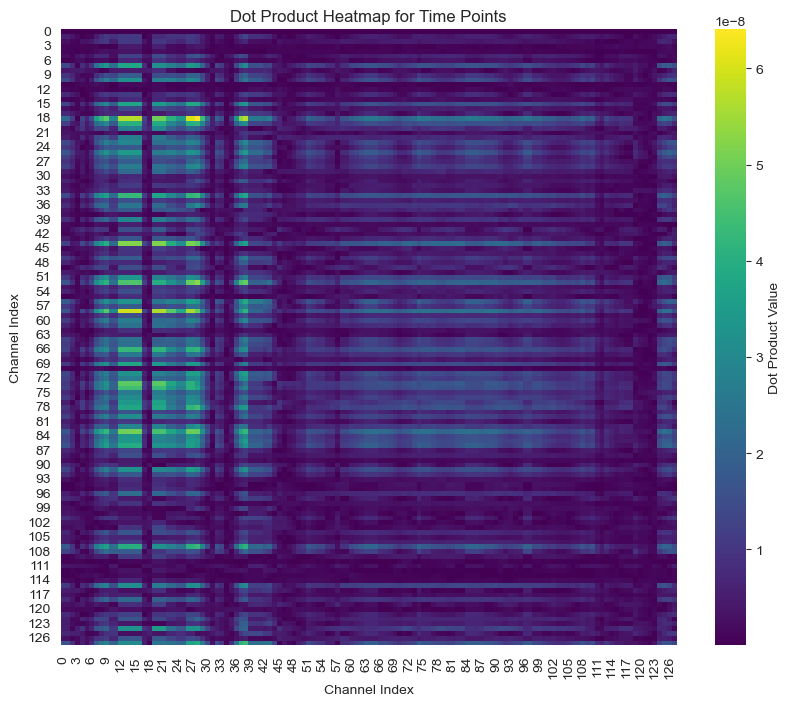

Channels A2 and A10 have high correlation.
Channels A2 and A11 have high correlation.
Channels A2 and A12 have high correlation.
Channels A2 and A13 have high correlation.
Channels A2 and A14 have high correlation.
Channels A2 and A15 have high correlation.
Channels A2 and A16 have high correlation.
Channels A2 and A17 have high correlation.
Channels A2 and A23 have high correlation.
Channels A2 and A24 have high correlation.
Channels A2 and A25 have high correlation.
Channels A2 and A26 have high correlation.
Channels A2 and A27 have high correlation.
Channels A2 and A28 have high correlation.
Channels A2 and A29 have high correlation.
Channels A2 and B6 have high correlation.
Channels A2 and B7 have high correlation.
Channels A2 and B8 have high correlation.
Channels A2 and B9 have high correlation.
Channels A2 and B10 have high correlation.
Channels A3 and A9 have high correlation.
Channels A3 and A10 have high correlation.
Channels A3 and A13 have high correlation.
Channels A3 and 

C:\Users\Home\AppData\Local\Temp\ipykernel_1352\110028068.py:65: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  p8_info.set_montage(montage)


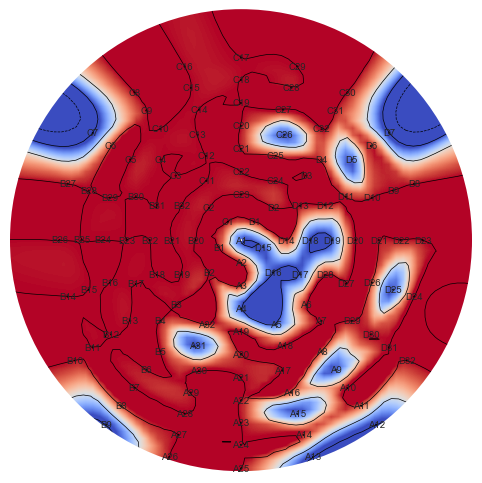

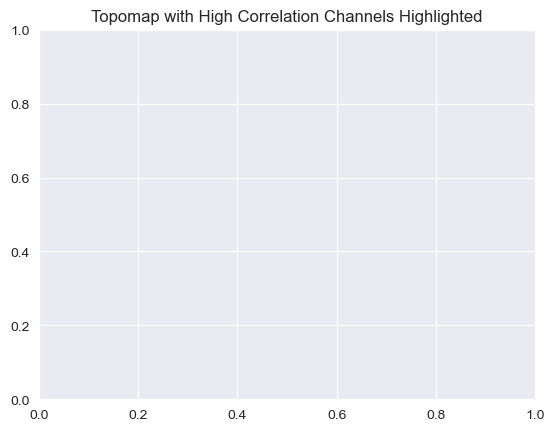

In [56]:
plot_high_correlation_channels(p7_epochs_train,p7_info,p7_electrodes_pos)

In [30]:
print(p8_info["ch_names"])

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']


In [ ]:
epochs_train = epochs_train.crop(2.,3.0)
epochs_test = epochs_test.crop(2.,3.0)
compute_accuracy_vs_contrast_with_sigmoid(epochs_train,adr_train_data,epochs_test,adr_test_data)

In [ ]:
classify_baseline_vs_stimulus_train_test(epochs_train,epochs_test,adr_train_data, adr_test_data,(2.0,3.0),(0.0,2.0))

XDawn test


In [ ]:
n_components = 2

xdawn = mne.preprocessing.Xdawn(n_components=n_components)
xdawn.fit(p8_epochs_train)
epochs_xdawn = xdawn.apply(p8_epochs_train)

epochs_xdawn.keys()
fig_xd = mne.viz.plot_epochs_image(epochs_xdawn['1'], picks=['A3'], vmax=500, vmin=-500)
fig_xd.savefig('./Image/XDA Train ICA')
fig_xd[0].savefig('./Image/XDA Train ICA')
fig_p8 = mne.viz.plot_epochs_image(p8_epochs_train, picks=['A3'], vmax=500, vmin=-500)
fig_p8[0].savefig('./Image/P8 Train ICA')